# Data Preprocessing

## Importing Libraries

In [37]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.dates as mdates
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
import datetime as dt
import matplotlib.dates as mdates
from tensorflow.keras import layers

## Dataset Overview

In [2]:
Data = pd.read_csv('GOOGL.csv')
Data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...,...
4426,2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4429,2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700


In [3]:
df = pd.DataFrame(Data)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...,...
4426,2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4429,2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4426,2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4429,2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700
4430,2022-03-24,2784.000000,2832.379883,2755.010010,2831.439941,2831.439941,1317900


## EDA on Stock Dataset

In [5]:
df.shape

(4431, 7)

### Missing Values

In [6]:
# Identify missing data (assumes that missing data is represented as NaN)
missing_data = df.isnull().sum()

In [7]:
# Print the number of missing entries in each column
print("Missing data in each column:")
print(missing_data)

Missing data in each column:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [8]:
print("\nPotential impact on model training:")
for column, missing_count in missing_data.items():
    if missing_count > 0:
        percentage = (missing_count / len(dataset)) * 100
        print(f"Column '{column}' has {missing_count} missing entries ({percentage:.2f}%).")


Potential impact on model training:


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4431 entries, 0 to 4430
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4431 non-null   object 
 1   Open       4431 non-null   float64
 2   High       4431 non-null   float64
 3   Low        4431 non-null   float64
 4   Close      4431 non-null   float64
 5   Adj Close  4431 non-null   float64
 6   Volume     4431 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 242.4+ KB


In [10]:
df['Date'] = pd.to_datetime(df['Date'], utc=True)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19 00:00:00+00:00,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20 00:00:00+00:00,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23 00:00:00+00:00,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24 00:00:00+00:00,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25 00:00:00+00:00,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...,...
4426,2022-03-18 00:00:00+00:00,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,2022-03-21 00:00:00+00:00,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,2022-03-22 00:00:00+00:00,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4429,2022-03-23 00:00:00+00:00,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700


In [11]:
df = df.sort_values(by='Date')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19 00:00:00+00:00,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20 00:00:00+00:00,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23 00:00:00+00:00,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24 00:00:00+00:00,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25 00:00:00+00:00,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...,...
4426,2022-03-18 00:00:00+00:00,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,2022-03-21 00:00:00+00:00,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,2022-03-22 00:00:00+00:00,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4429,2022-03-23 00:00:00+00:00,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700


In [12]:
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...,...
4426,2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
4427,2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
4428,2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800
4429,2022-03-23,2774.050049,2791.770020,2756.699951,2765.510010,2765.510010,1257700


In [13]:
stats = df.describe()
stats

,Open,High,Low,Close,Adj Close,Volume
count,4431.000000,4431.000000,4431.000000,4431.000000,4431.000000,4.431000e+03
mean,693.087345,699.735595,686.078751,693.097367,693.097367,6.444992e+06
std,645.118799,651.331215,638.579488,645.187806,645.187806,7.690351e+06
min,49.644646,50.920921,48.028027,50.055054,50.055054,4.656000e+05
25%,248.558563,250.853355,245.813309,248.415916,248.415916,1.695600e+06
50%,434.924927,437.887878,432.687683,435.330322,435.330322,3.778418e+06
75%,1007.364990,1020.649994,997.274994,1007.790008,1007.790008,8.002390e+06
max,3025.000000,3030.929932,2977.979980,2996.770020,2996.770020,8.215117e+07


In [14]:
#calculate range, and move columns 25%,50%,75%  and mean values into a dataframe
stats.loc['range'] = stats.loc['max'] - stats.loc['min']
new_df = stats.loc[['mean', 'range', '25%', '50%', '75%']]
new_df.rename({'50%': 'median'}, inplace=True)
new_df

,Open,High,Low,Close,Adj Close,Volume
mean,693.087345,699.735595,686.078751,693.097367,693.097367,6.444992e+06
range,2975.355354,2980.009011,2929.951953,2946.714966,2946.714966,8.168557e+07
25%,248.558563,250.853355,245.813309,248.415916,248.415916,1.695600e+06
median,434.924927,437.887878,432.687683,435.330322,435.330322,3.778418e+06
75%,1007.364990,1020.649994,997.274994,1007.790008,1007.790008,8.002390e+06


In [15]:
DF = df.copy()
DF['Date'] = pd.to_datetime(DF['Date'])
# Set 'date' column as index
DF = DF.set_index('Date')
DF

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602
...,...,...,...,...,...,...
2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100
2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600
2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800


In [16]:
DF.shape

(4431, 6)

In [17]:
DF.drop(columns =['Adj Close'] , inplace=True)
DF

,Open,High,Low,Close,Volume
Date,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,44659096
2004-08-20,50.555557,54.594597,50.300301,54.209209,22834343
2004-08-23,55.430431,56.796799,54.579578,54.754753,18256126
2004-08-24,55.675674,55.855858,51.836838,52.487488,15247337
2004-08-25,52.532532,54.054054,51.991993,53.053055,9188602
...,...,...,...,...,...
2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2223100
2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,1341600
2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,1774800


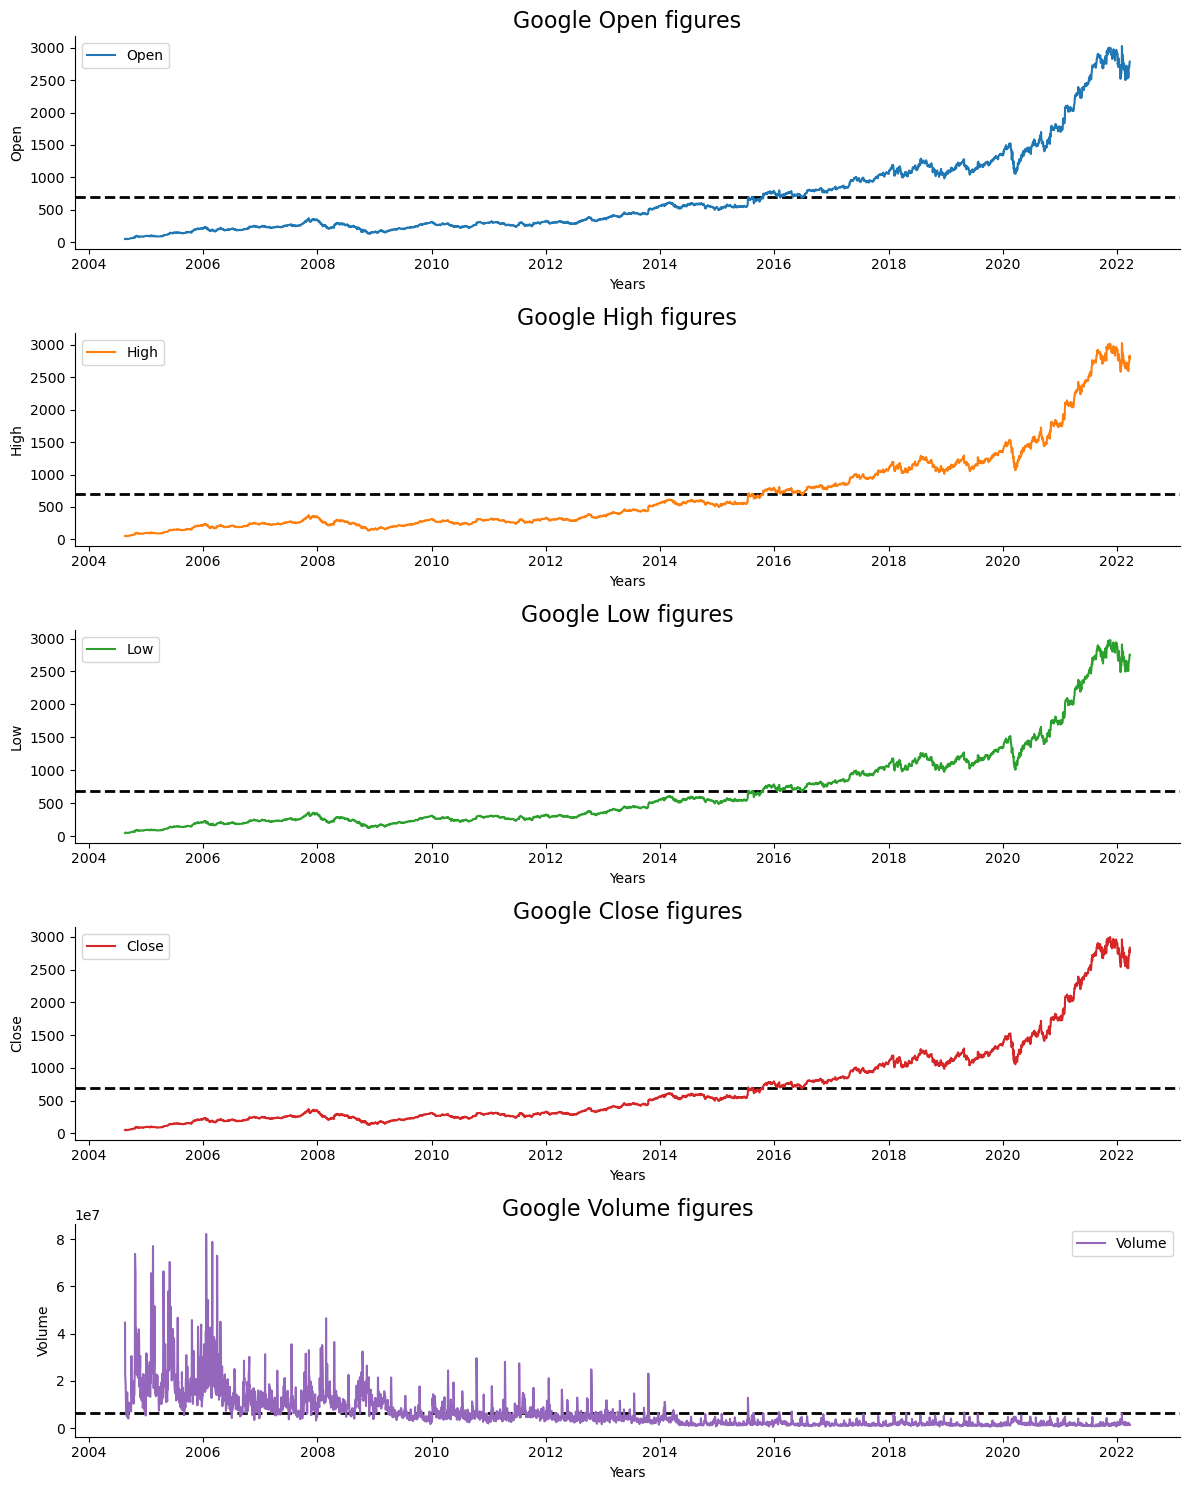

In [18]:
# This code plots columns in a dataframe.

# The number of rows, columns, and the subplot counter are initialized. 
a = 5  # number of rows
b = 1  # number of columns
c = 1  # initialize plot counter

colors = plt.rcParams["axes.prop_cycle"]()
# A figure is initialized 
fig = plt.figure(figsize=(12,15))

for i in range(len(DF.columns)):
    color = next(colors)["color"]
    plt.subplot(a, b, c)
    #Plotting the line for each column in a different color
    plt.plot(DF[DF.columns[i]], color = color)
    # The spines of each plot are made invisible and the figure is adjusted and shown.
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    #Adding a horizontal line for the average of the column
    plt.axhline(DF[DF.columns[i]].mean(), linestyle='--', lw=2, zorder=1, color='black')
    #Adding Title
    plt.title("Google "+ DF.columns[i] + " figures", fontsize=16)
    plt.xlabel('Years')
    #Adding y axis label
    plt.ylabel(DF.columns[i])
    #Adding Legend
    plt.legend([DF.columns[i]])
    #Plot Counter value is increased by one after each iteration
    c = c + 1

#Layout is tightended up
plt.tight_layout()

#plot is displayed
plt.show()

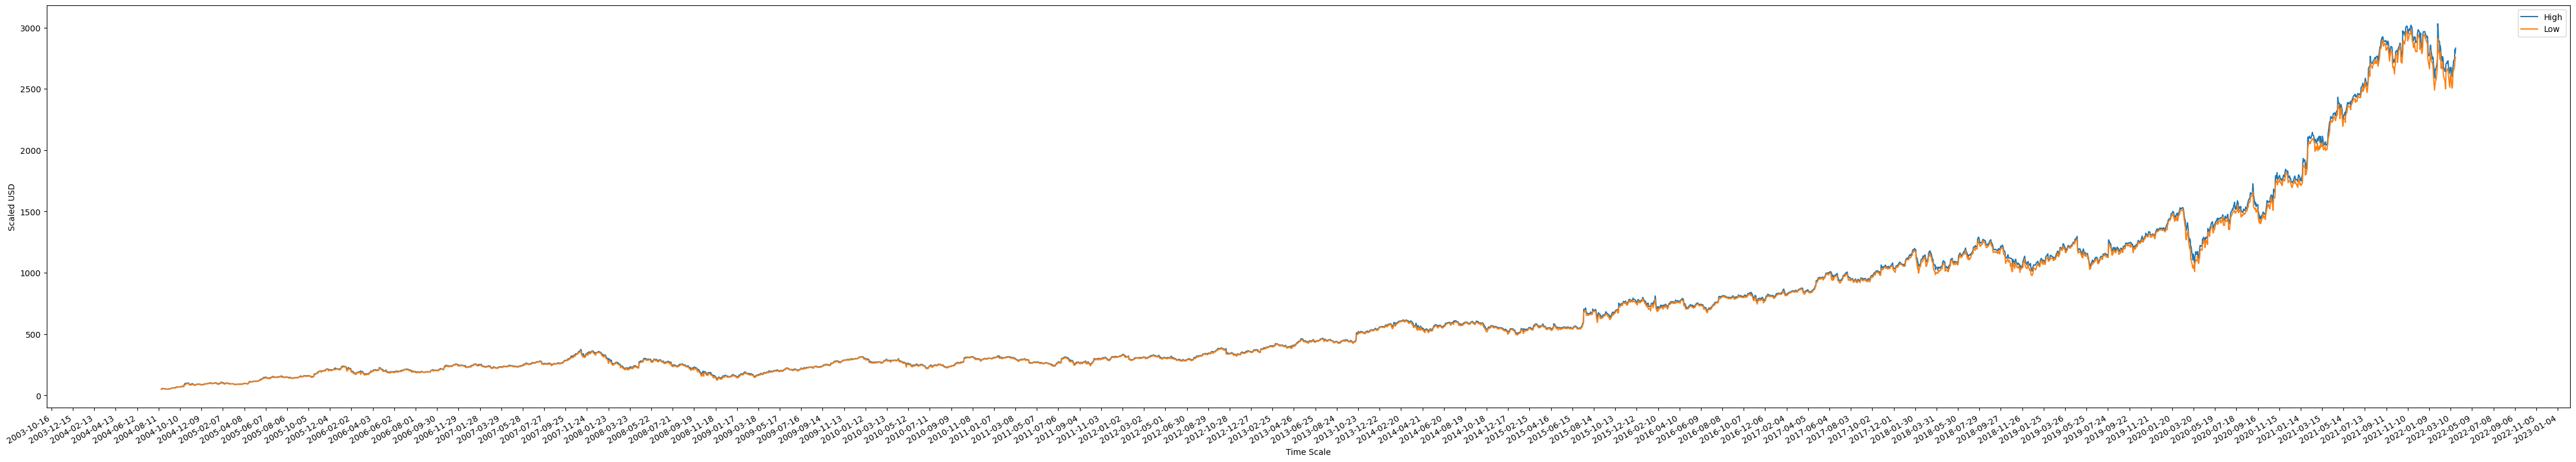

In [19]:

# Assuming DF is your DataFrame and its index is of type datetime64
plt.figure(figsize=(55,10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60))

# Convert the index to a list of datetime objects
x_dates = [pd.to_datetime(d) for d in DF.index]

plt.plot(x_dates, DF['High'], label='High')
plt.plot(x_dates, DF['Low'], label='Low')
plt.xlabel('Time Scale')
plt.ylabel('Scaled PKR')
plt.legend()
plt.gcf().autofmt_xdate()
plt.show()


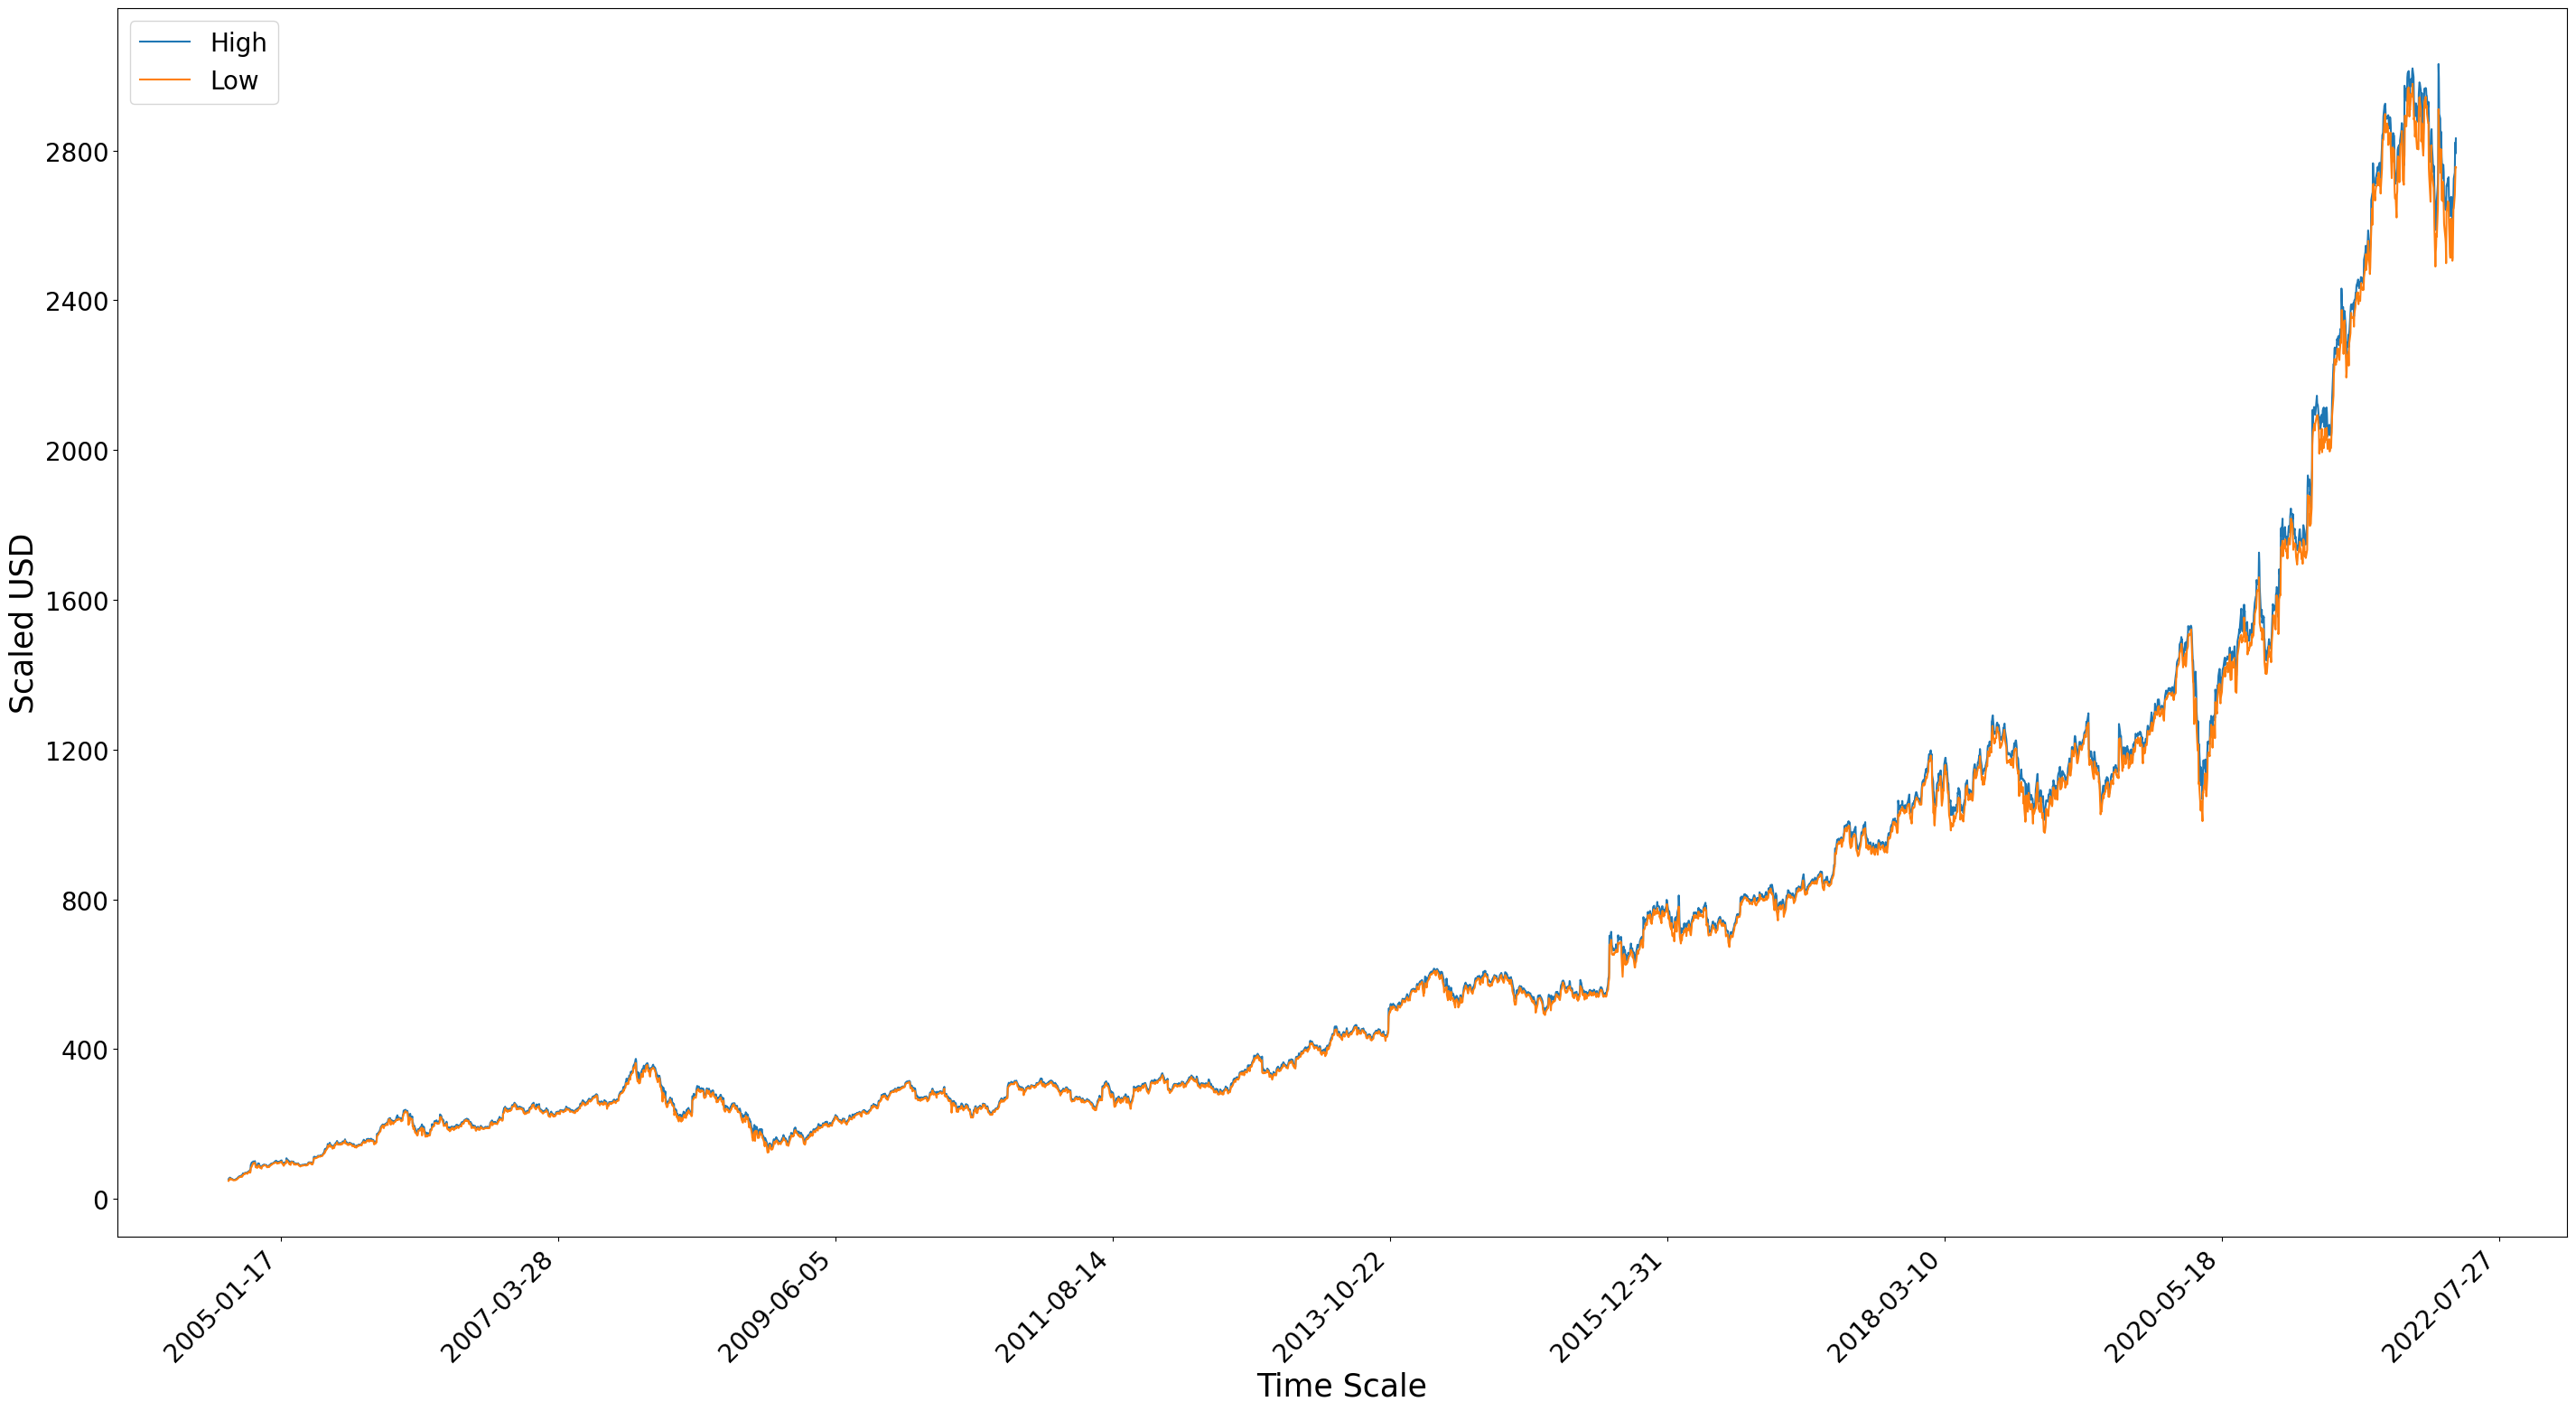

In [20]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker

# Increase figure size
plt.figure(figsize=(35, 20))

# Set x-axis date format and interval
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60))

# Convert date strings to datetime objects
x_dates = [pd.to_datetime(d) for d in DF.index]

# Plot data
plt.plot(x_dates, DF['High'], label='High')
plt.plot(x_dates, DF['Low'], label='Low')

# Set labels with increased font size
plt.xlabel('Time Scale', fontsize=25)
plt.ylabel('Scaled USD', fontsize=25)
plt.legend(fontsize=20)

# Rotate x-axis labels for better readability
plt.gcf().autofmt_xdate(rotation=45, ha='right')
plt.xticks(fontsize=20)  # Set x-axis labels font size

# Limit the number of x-axis ticks
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(nbins=10))

# Limit the number of y-axis ticks
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(nbins=10))
plt.yticks(fontsize=20)  # Set y-axis labels font size

# Show plot
plt.show()


<Axes: >

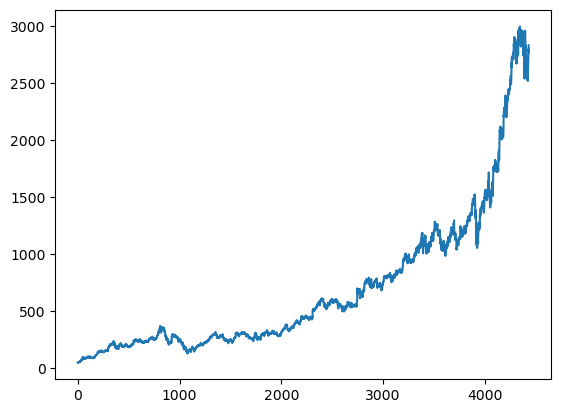

In [21]:
#Plot the True Adj Close Value
df['Close'].plot()

# Splitting Dataset into Training and Test Dataset

In [22]:
training_set = DF[:'2020'].iloc[:,0:1].values
test_set = DF['2020':].iloc[:,0:1].values

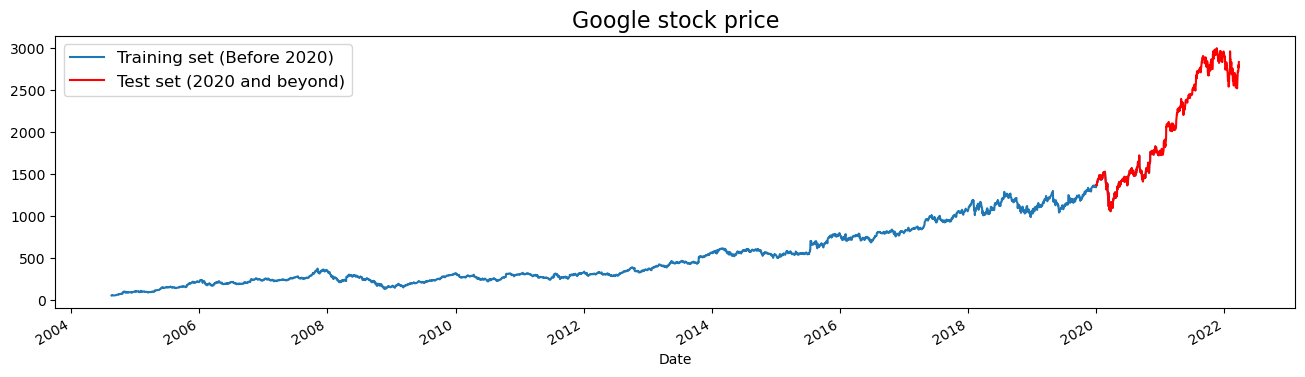

In [23]:
# Using 'close' price for prediction.
DF['Close'][:'2020'].plot(figsize=(16,4),legend=True)
DF['Close']['2020':].plot(figsize=(16,4),legend=True, color = 'r')
plt.legend(['Training set (Before 2020)','Test set (2020 and beyond)'], fontsize=12)
plt.title('Google stock price', fontsize=16)
plt.show()

### Feature Scaling

In [24]:
# Normalization is very important in all deep learning in general. Normalization makes the properties more consistent.
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

# LSTM

## Data Processing For LSTM

In [25]:
timesteps = 60
X_train = []
y_train = []
for i in range(timesteps,1147):
    X_train.append(training_set_scaled[i-timesteps:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [26]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [27]:
dataset_total = pd.concat((DF['Close'][:'2020'], DF['Close']['2020':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [28]:
# Preparing X_test
X_test = []
for i in range(timesteps, len(inputs)):
    X_test.append(inputs[i-timesteps:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

# Creating the Model

In [29]:
# The LSTM architecture
Model = Sequential()
# First LSTM layer with Dropout regularisation
Model.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1],1)))
Model.add(Dropout(0.2))
# Second LSTM layer
Model.add(LSTM(units = 100, return_sequences = True))
Model.add(Dropout(0.2))
# # Third LSTM layer
# Model.add(LSTM(units = 100, return_sequences = True))
# Model.add(Dropout(0.2))
# Fourth LSTM layer
##add 4th lstm layer
#Model.add(layers.LSTM(units = 100))
#Model.add(layers.Dropout(rate = 0.2))

Model.add(layers.LSTM(units = 100, return_sequences = False))
Model.add(layers.Dropout(rate = 0.2))
Model.add(layers.Dense(units = 25))
Model.add(layers.Dense(units = 1))
# The output layer
Model.add(Dense(units = 1))

Model.summary()

C:\Users\Ruman\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 100)             │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 60, 100)             │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 60, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           2,525 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 204,153 (797.47 KB)

 Trainable params: 204,153 (797.47 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Compiling the model
Model.compile(optimizer= 'adam', loss = 'mean_squared_error')

In [31]:
# Epochs and Batch Size
epochs = 15
batch_size = 32

In [32]:
# Fitting the model 
history =  Model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size)

Epoch 1/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 13s 102ms/step - loss: 0.0017
Epoch 2/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - loss: 1.1275e-04
Epoch 3/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - loss: 9.0044e-05
Epoch 4/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 9.0585e-05
Epoch 5/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - loss: 7.7334e-05
Epoch 6/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - loss: 8.6821e-05
Epoch 7/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 6.6421e-05
Epoch 8/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - loss: 6.8561e-05
Epoch 9/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - loss: 5.3960e-05
Epoch 10/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - loss: 5.7666e-05
Epoch 11/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - loss: 5.6379e-05
Epoch 12/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - loss: 5.1707e-05
Epoch 13/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - loss: 4.4945e-05
Epoch 14/15
34/34 ━━━━━━━━━━━━━━━━━━━━ 4s 104ms/step - loss: 4.8388e-05
Epoch 15/15

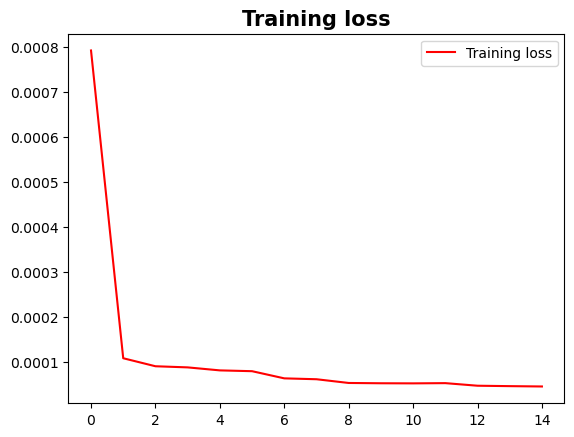

<Figure size 640x480 with 0 Axes>

In [33]:
loss = history.history['loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')

plt.title('Training loss', size=15, weight='bold')
plt.legend(loc=0)
plt.figure()

plt.show()

In [34]:
predicted_stock_price = Model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step


In [35]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real Google Stock Price')
    plt.plot(predicted, color='blue',label='Predicted Google Stock Price')
    plt.title('Google Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Google Stock Price')
    plt.legend()
    plt.show()

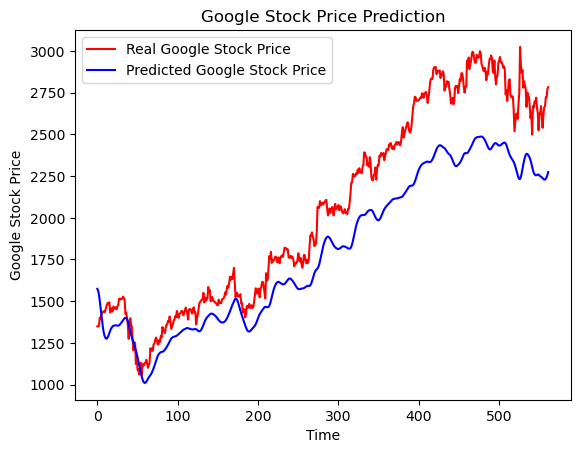

In [36]:
# Visualizing the results for LSTM
plot_predictions(test_set, predicted_stock_price)